In [44]:
pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split



In [46]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf 
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

In [47]:
# Load dataset
data = pd.read_csv('/workspaces/wp/Woodpecker/Sales_Demand.csv',encoding='ISO-8859-1')

In [48]:
data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [49]:
data.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [50]:
data.dtypes

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

In [51]:
data.size

70575

In [52]:

# Convert 'ORDERDATE' to datetime
data['ORDERDATE'] = pd.to_datetime(data['ORDERDATE'])

# Sort by date
data.sort_values('ORDERDATE', inplace=True)


In [53]:
data.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2004-05-11 00:16:49.989372928,2.717676,7.092455,2003.81509,100.715551
min,10100.000000,6.000000,26.880000,1.000000,482.130000,2003-01-06 00:00:00,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2003-11-06 12:00:00,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,2004-06-15 00:00:00,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,2004-11-17 12:00:00,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,2005-05-31 00:00:00,4.000000,12.000000,2005.00000,214.000000
std,92.085478,9.741443,20.174277,4.225841,1841.865106,NaN,1.203878,3.656633,0.69967,40.187912


In [54]:
data.set_index('ORDERDATE' , inplace=True)

In [55]:
data

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
ORDERDATE,,,,,,,,,,,,,,,,,,,,,
2003-01-06,10100,30,100.00,3,5151.00,Shipped,1,1,2003,Vintage Cars,...,2304 Long Airport Avenue,NaN,Nashua,NH,62005,USA,NaN,Young,Valarie,Medium
2003-01-06,10100,50,67.80,2,3390.00,Shipped,1,1,2003,Vintage Cars,...,2304 Long Airport Avenue,NaN,Nashua,NH,62005,USA,NaN,Young,Valarie,Medium
2003-01-06,10100,22,86.51,4,1903.22,Shipped,1,1,2003,Vintage Cars,...,2304 Long Airport Avenue,NaN,Nashua,NH,62005,USA,NaN,Young,Valarie,Small
2003-01-06,10100,49,34.47,1,1689.03,Shipped,1,1,2003,Vintage Cars,...,2304 Long Airport Avenue,NaN,Nashua,NH,62005,USA,NaN,Young,Valarie,Small
2003-01-09,10101,45,31.20,3,1404.00,Shipped,1,1,2003,Vintage Cars,...,Lyonerstr. 34,NaN,Frankfurt,NaN,60528,Germany,EMEA,Keitel,Roland,Small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-05-31,10425,18,100.00,2,1895.94,In Process,2,5,2005,Trucks and Buses,...,"67, rue des Cinquante Otages",NaN,Nantes,NaN,44000,France,EMEA,Labrune,Janine,Small
2005-05-31,10425,33,100.00,4,4692.60,In Process,2,5,2005,Trucks and Buses,...,"67, rue des Cinquante Otages",NaN,Nantes,NaN,44000,France,EMEA,Labrune,Janine,Medium
2005-05-31,10425,38,100.00,12,5894.94,In Process,2,5,2005,Classic Cars,...,"67, rue des Cinquante Otages",NaN,Nantes,NaN,44000,France,EMEA,Labrune,Janine,Medium


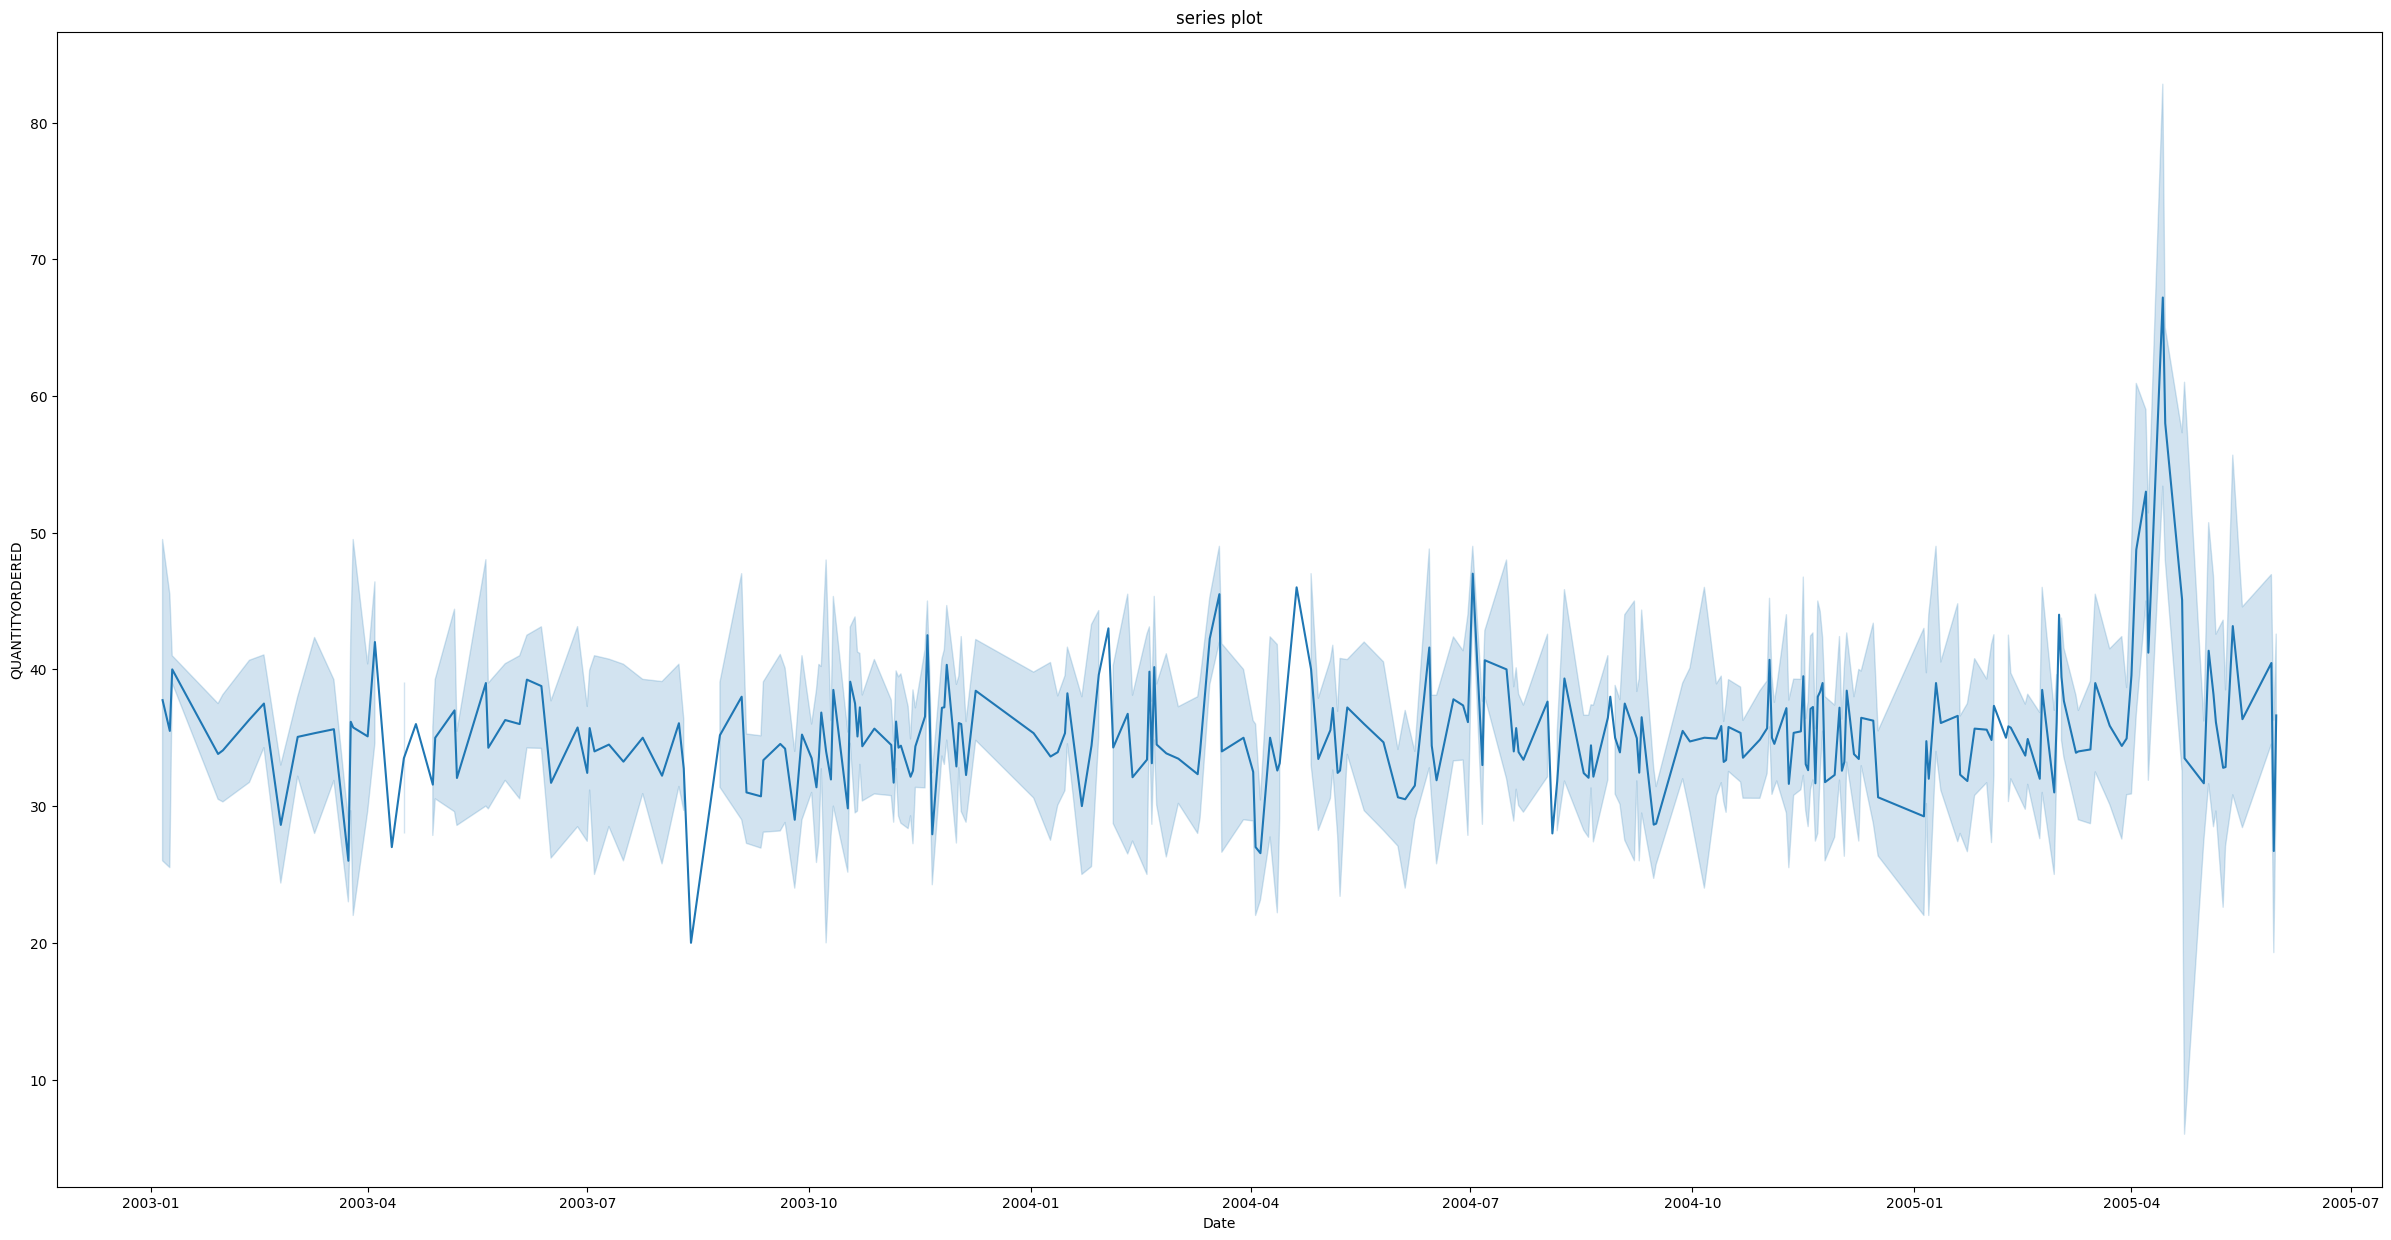

In [56]:
plt.figure(figsize=(30,15))
sns.lineplot(data=data , x='ORDERDATE',y='QUANTITYORDERED')
plt.xlabel('Date')
plt.ylabel('QUANTITYORDERED')
plt.title('series plot')
plt.show()

In [57]:
import warnings
warnings.filterwarnings('ignore')

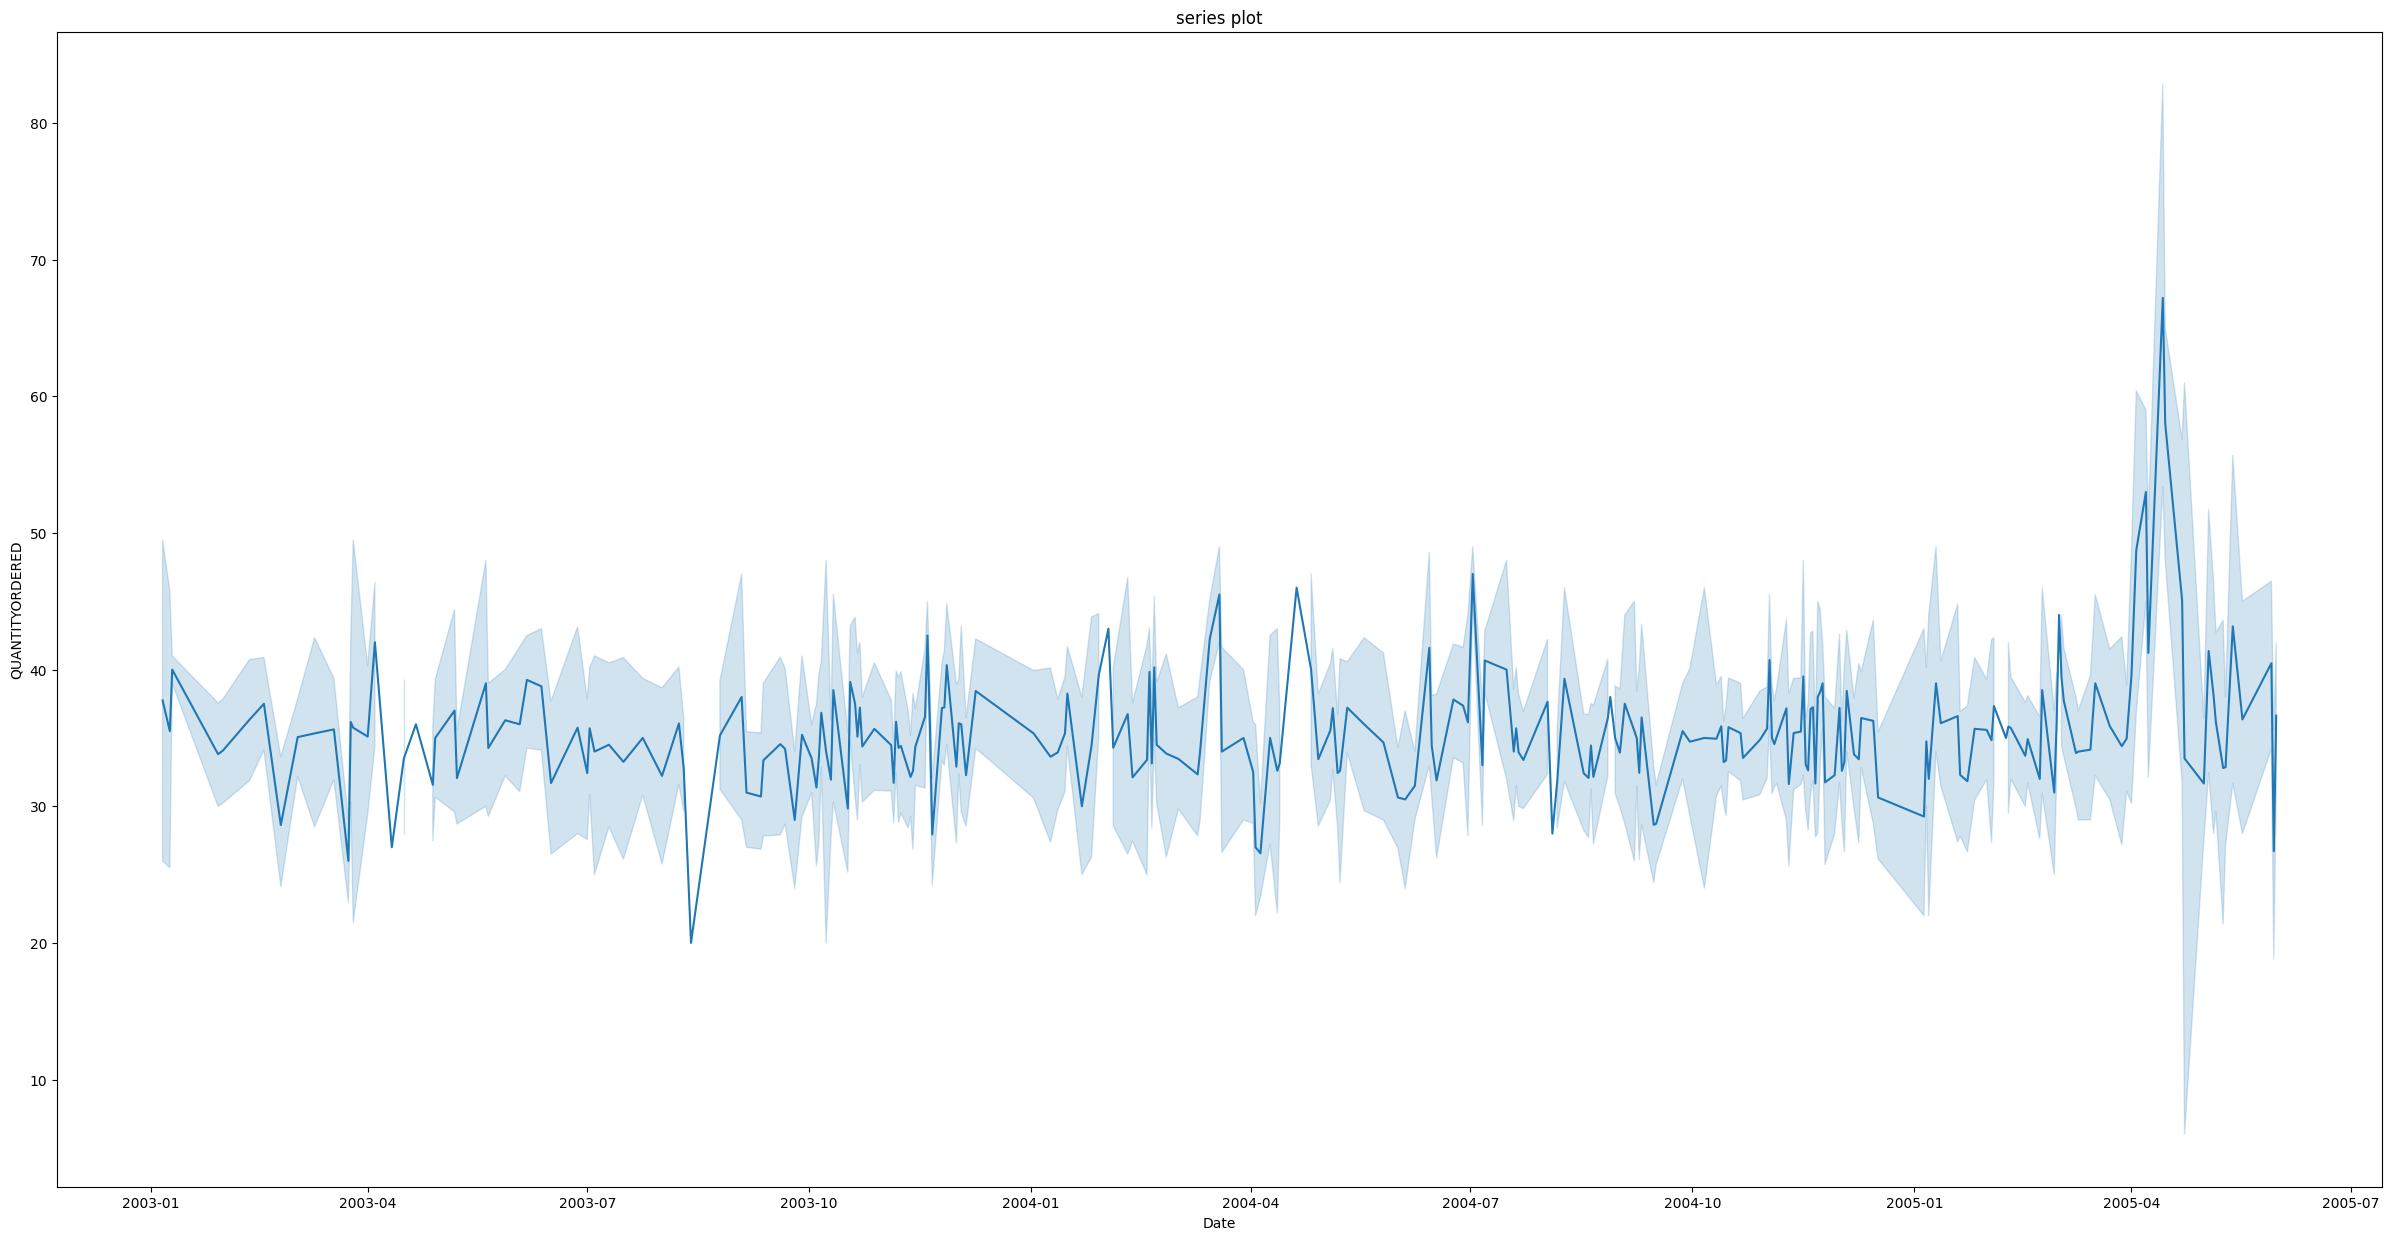

In [58]:
plt.figure(figsize=(30,15))
sns.lineplot(data=data , x='ORDERDATE',y='QUANTITYORDERED')
plt.xlabel('Date')
plt.ylabel('QUANTITYORDERED')
plt.title('series plot')
plt.show()

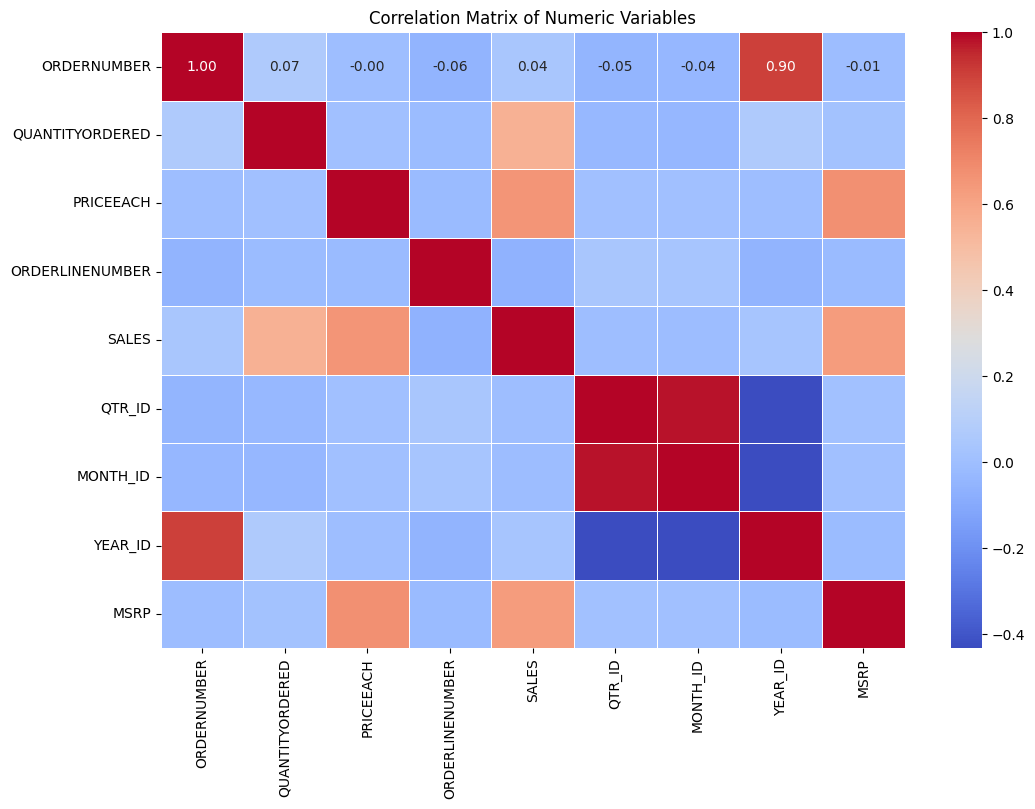

In [59]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_matrix = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numeric Variables")
plt.show()

In [60]:
def testing_stationarity(df):
    result= adfuller(df)
    print(f"ADF STAT:{result[0]}")
    print(f"P-value :{result[1]}")
    if result[1] < 0.05:
        print("Data is stationary")
    else:
        print("Data is not stationary")

testing_stationarity(data['QUANTITYORDERED'])

ADF STAT:-10.500403503575816
P-value :1.0877620296223442e-18
Data is stationary


In [61]:


# Aggregate demand by date
daily_demand = data.groupby('ORDERDATE')[['QUANTITYORDERED', 'SALES']].sum().reset_index()

# Feature engineering
daily_demand['year'] = daily_demand['ORDERDATE'].dt.year
daily_demand['month'] = daily_demand['ORDERDATE'].dt.month
daily_demand['day'] = daily_demand['ORDERDATE'].dt.day
daily_demand['dayofweek'] = daily_demand['ORDERDATE'].dt.dayofweek


In [62]:
daily_demand.head()

,ORDERDATE,QUANTITYORDERED,SALES,year,month,day,dayofweek
0,2003-01-06,151,12133.25,2003,1,6,0
1,2003-01-09,142,11432.34,2003,1,9,3
2,2003-01-10,80,6864.05,2003,1,10,4
3,2003-01-29,541,54702.00,2003,1,29,2
4,2003-01-31,443,44621.96,2003,1,31,4


In [63]:
daily_demand.set_index('ORDERDATE', inplace=True)
daily_demand

,QUANTITYORDERED,SALES,year,month,day,dayofweek
ORDERDATE,,,,,,
2003-01-06,151,12133.25,2003,1,6,0
2003-01-09,142,11432.34,2003,1,9,3
2003-01-10,80,6864.05,2003,1,10,4
2003-01-29,541,54702.00,2003,1,29,2
2003-01-31,443,44621.96,2003,1,31,4
...,...,...,...,...,...,...
2005-05-13,259,31821.90,2005,5,13,4
2005-05-17,509,59475.10,2005,5,17,1
2005-05-29,607,51233.18,2005,5,29,6


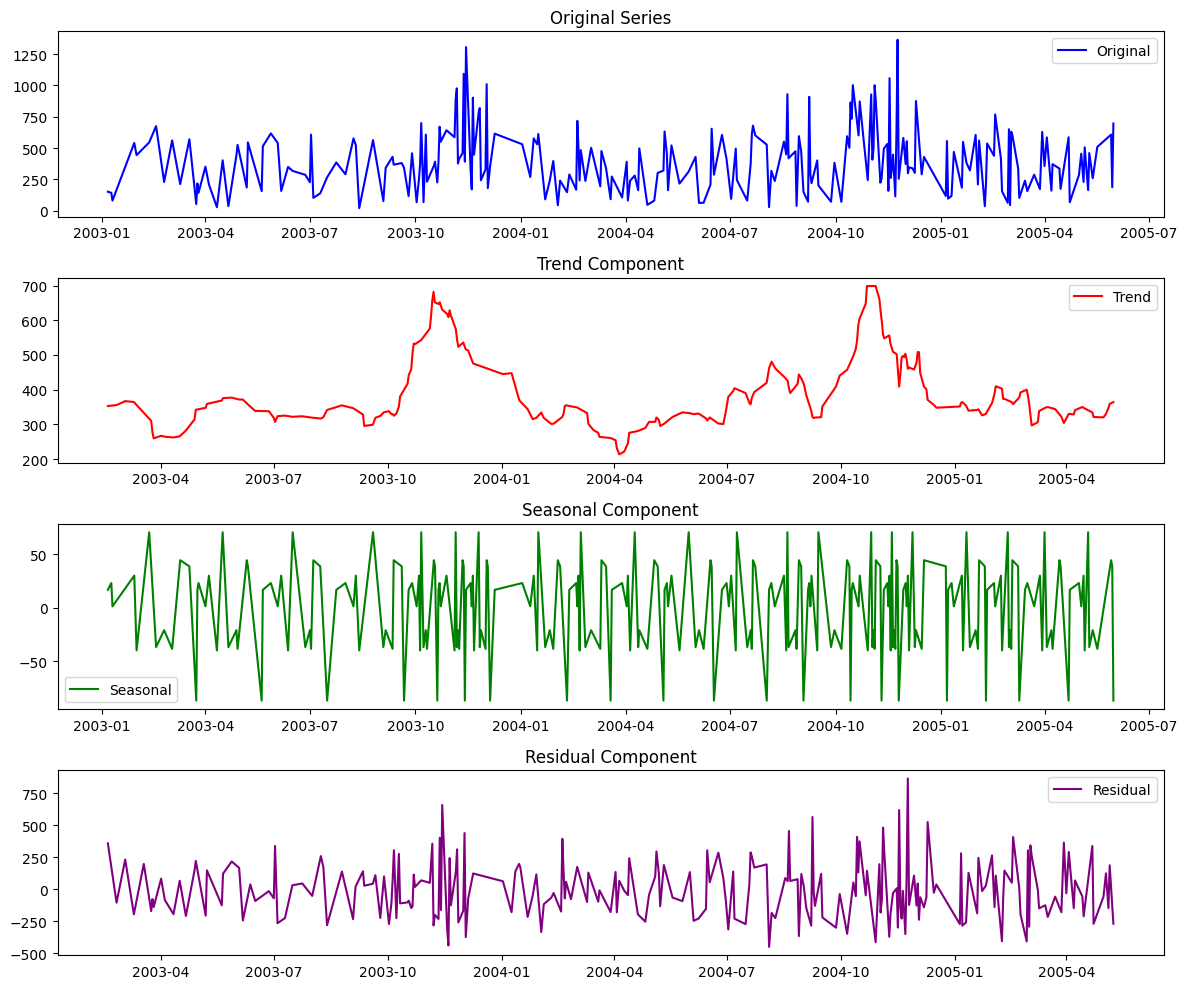

In [64]:
# Decompose using a period of 3 (quarterly seasonality)
decomposition = seasonal_decompose(daily_demand['QUANTITYORDERED'], model='additive', period=12)

plt.figure(figsize=(12, 10))

# Original Series
plt.subplot(4, 1, 1)
plt.plot(daily_demand['QUANTITYORDERED'], label="Original", color='blue')
plt.title("Original Series")
plt.legend()

# Trend Component
plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label="Trend", color='red')
plt.title("Trend Component")
plt.legend()

# Seasonal Component
plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label="Seasonal", color='green')
plt.title("Seasonal Component")
plt.legend()

# Residual Component
plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label="Residual", color='purple')
plt.title("Residual Component")
plt.legend()

plt.tight_layout()
plt.show()

In [65]:
# Create lag features (Previous demand values as exogenous variables)
for lag in range(1, 8):
  daily_demand[f'lag_{lag}'] = daily_demand['QUANTITYORDERED'].shift(lag)


In [66]:
daily_demand

,QUANTITYORDERED,SALES,year,month,day,dayofweek,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
ORDERDATE,,,,,,,,,,,,,
2003-01-06,151,12133.25,2003,1,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-01-09,142,11432.34,2003,1,9,3,151.0,NaN,NaN,NaN,NaN,NaN,NaN
2003-01-10,80,6864.05,2003,1,10,4,142.0,151.0,NaN,NaN,NaN,NaN,NaN
2003-01-29,541,54702.00,2003,1,29,2,80.0,142.0,151.0,NaN,NaN,NaN,NaN
2003-01-31,443,44621.96,2003,1,31,4,541.0,80.0,142.0,151.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-05-13,259,31821.90,2005,5,13,4,460.0,164.0,506.0,229.0,455.0,285.0,67.0
2005-05-17,509,59475.10,2005,5,17,1,259.0,460.0,164.0,506.0,229.0,455.0,285.0
2005-05-29,607,51233.18,2005,5,29,6,509.0,259.0,460.0,164.0,506.0,229.0,455.0


In [67]:
# Drop rows with missing values due to lagging
daily_demand.dropna(inplace=True)
daily_demand

,QUANTITYORDERED,SALES,year,month,day,dayofweek,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
ORDERDATE,,,,,,,,,,,,,
2003-02-24,229,25783.76,2003,2,24,0,675.0,545.0,443.0,541.0,80.0,142.0,151.0
2003-03-03,561,55245.02,2003,3,3,0,229.0,675.0,545.0,443.0,541.0,80.0,142.0
2003-03-10,212,27398.82,2003,3,10,0,561.0,229.0,675.0,545.0,443.0,541.0,80.0
2003-03-18,570,51017.92,2003,3,18,1,212.0,561.0,229.0,675.0,545.0,443.0,541.0
2003-03-24,52,9749.00,2003,3,24,0,570.0,212.0,561.0,229.0,675.0,545.0,443.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-05-13,259,31821.90,2005,5,13,4,460.0,164.0,506.0,229.0,455.0,285.0,67.0
2005-05-17,509,59475.10,2005,5,17,1,259.0,460.0,164.0,506.0,229.0,455.0,285.0
2005-05-29,607,51233.18,2005,5,29,6,509.0,259.0,460.0,164.0,506.0,229.0,455.0


In [68]:

# Define features (Exogenous) and target (Endogenous)
X = daily_demand[['SALES'] + [f'lag_{lag}' for lag in range(1, 8)]]
y = daily_demand['QUANTITYORDERED']

# Split data into training and test sets (Time-based split, no shuffle)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [69]:
len(y_train)

196

In [70]:
# Fit the ARIMAX model
model = SARIMAX(y_train, exog=X_train, order=(5, 1, 5), seasonal_order=(1, 1, 1, 12))
arimax_result = model.fit(disp=False)

# Make predictions
y_pred = arimax_result.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, exog=X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (ARIMAX): {mse}')

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error (ARIMAX): {rmse}')

Mean Squared Error (ARIMAX): 4964.13836743722
Root Mean Squared Error (ARIMAX): 70.456641755318


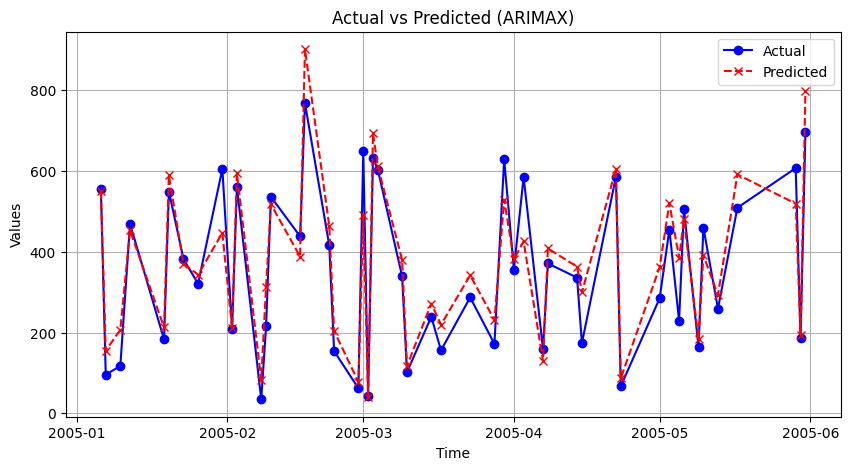

In [71]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(y_test.index, y_test, label="Actual", color="blue", marker='o')
plt.plot(y_test.index, y_pred, label="Predicted", color="red", linestyle="dashed", marker='x')

plt.xlabel("Time")
plt.ylabel("Values")
plt.title("Actual vs Predicted (ARIMAX)")
plt.legend()
plt.grid()
plt.show()